In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

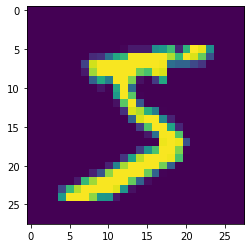

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [12]:
#create model
model = Sequential()

In [13]:
model.add(Conv2D(64, 
                 kernel_size=3, 
                 activation='relu', 
                 input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = 2))

In [14]:
model.add(Conv2D(32, 
                 kernel_size=3, 
                 activation='relu'))
model.add(MaxPool2D(pool_size = 2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [20]:
model.compile(optimizer='adam', loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2460 - accuracy: 0.9438 - val_loss: 0.0835 - val_accuracy: 0.9750
Epoch 2/3
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.0617 - val_accuracy: 0.9821
Epoch 3/3
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0555 - val_accuracy: 0.9843


In [22]:
import numpy as np

In [23]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)

In [24]:
y_test_pred = np.argmax(model.predict(X_test), axis=1)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_train_pred, y_true=y_train))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_train_pred, y_true=y_train)}")

Confusion Matrix
[[5857    0   18    0    0   18   19    3    6    2]
 [   8 6682   17    0    0    0    2   30    3    0]
 [   1    4 5914    1    0    1    0   37    0    0]
 [   1    3    9 6094    0   12    1    6    2    3]
 [   0   12   54    0 5683    1    9   44    5   34]
 [   1    0    2   23    0 5386    4    0    2    3]
 [   5    2    4    1    1   11 5890    1    3    0]
 [   0    4   10    6    1    0    0 6236    1    7]
 [  10   10   44   14    4   28   10   10 5703   18]
 [   4    1   30   10   20    9    1   21    6 5847]]


 Accuracy 0.9882


In [27]:
print("Confusion Matrix")
print(confusion_matrix(y_pred = y_test_pred, y_true=y_test))
print("\n")
print(f" Accuracy {accuracy_score(y_pred = y_test_pred, y_true=y_test)}")

Confusion Matrix
[[ 963    0    4    0    0    7    4    1    1    0]
 [   3 1126    1    1    0    0    0    3    1    0]
 [   0    1 1019    0    0    0    0   12    0    0]
 [   0    0    3 1005    0    1    0    1    0    0]
 [   0    1    8    0  950    0    3    9    1   10]
 [   0    0    0    8    0  883    1    0    0    0]
 [   1    2    2    1    0    6  944    0    2    0]
 [   0    3    4    0    0    0    0 1019    1    1]
 [   4    0    6    3    2    3    0    3  947    6]
 [   0    3    7    1    3    5    0    3    0  987]]


 Accuracy 0.9843
